# Метод Монте-Карло в физике

Методами Монте-Карло называют множество различных методов в совершенно разных областях от физики до экономики. Основная суть этих методов заключается в использовании случайных величин для получения различных состояний исследуемой системы. 

Одно из частых применений метода Монте-Карло в физике состоит в расчете интегралов. При этом действительно полезным и незаменимым метод становится при работе с большим количеством измерений, когда построение обычных квадратур приводит к чересчур  огромным сеткам. Например, уже в случае 10 измерений, задание обычной равномерной решетки шириной в $2^4 = 16$ узлов, приводит к общей сетке размера $2^{40} \simeq 10^{12}$. Массив данных float такого размера будет занимать 4ТБ в памяти компьютера. Оперировать такими интегралами стандартными методами становится принципиально невозможно.

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.special as sp
plt.style.use('ggplot')
%matplotlib notebook

## Задание 1
Вычислим объем многомерной сферы в большом количестве измерений.

### Задание 1.1 
Напишите функцию, вычисляющую точный объем $d$-мерной сферы с помощью явного выражения. 
Объем многомерной сферы радиуса $R$ в $d$-измерениях дается формулой: 
$$
V_d = \frac{\pi^{d/2}} {\Gamma(1 + d/2)}
$$
где $\Gamma(x)$ - гамма функция, значение которой можно получить из scipy.special.

In [9]:
def getSphereVolumeExact(D, R = 1.0):
    V = R**D * np.pi**(D/2) / sp.gamma(1 + D/2)
    return V

1. Проверьте результат для нескольких известных вам значений. 
2. Построите график V(D)

объем двумерной сферы - 3.142
объем трехмерной сферы - 4.189


<IPython.core.display.Javascript object>


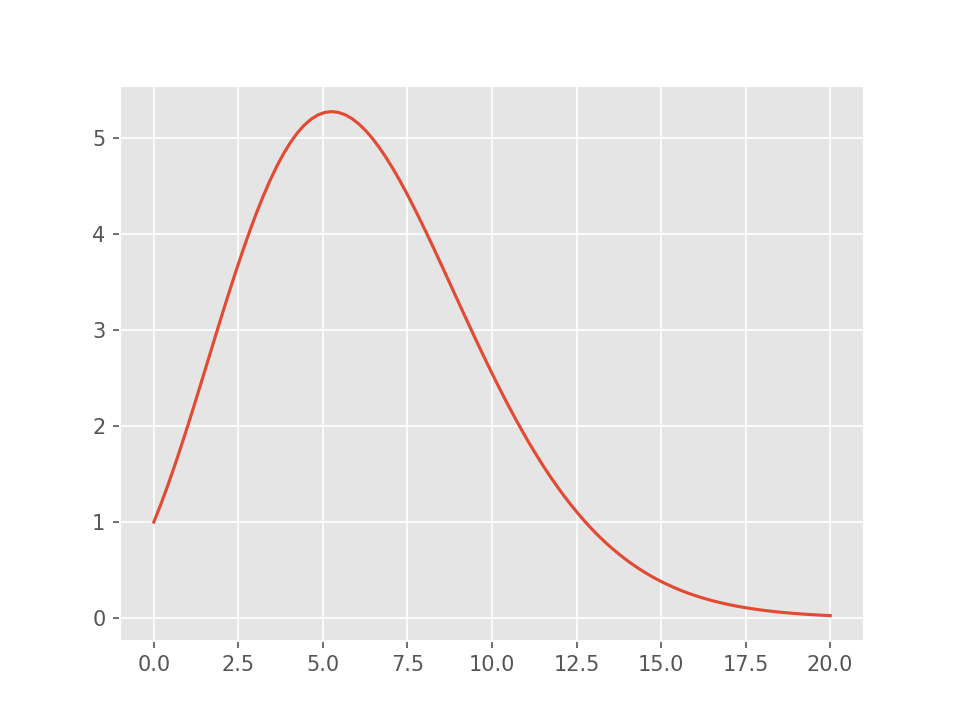

In [200]:
print('объем двумерной сферы - %.3f' %(getSphereVolumeExact(2)))
print('объем трехмерной сферы - %.3f' %(getSphereVolumeExact(3)))

r = 1
plt.figure()
D = []
V = []
Dim = np.linspace(0, 20, 100)
for d in Dim:
    D.append(d)
    V.append(getSphereVolumeExact(d, r))
plt.plot(D, V)
plt.show()

### Задание 1.2
Напишите функцию, вычисляющую объем сферы методом Монте-Карло на псевдослучайных числах (используя, например `numpy.random.rand`).

In [202]:
def getSphereVolumePseudorandom(N, D, R = 1):
    data = np.random.rand(D, N)
    code = np.zeros(N)
    for i in range(N):
        if np.linalg.norm(data[:, i]) < 1:
            code[i] = 1
    V = (2 * R)**D * sum(code) / N
    return V

Постройте график зависимости относительной точности $\epsilon$ которая достигается при фиксированном $N$ от размерности сферы $D$. Для относительной точности используйте выражение $\epsilon = (V_{exact} - V_{random})/V_{exact}$.

<IPython.core.display.Javascript object>


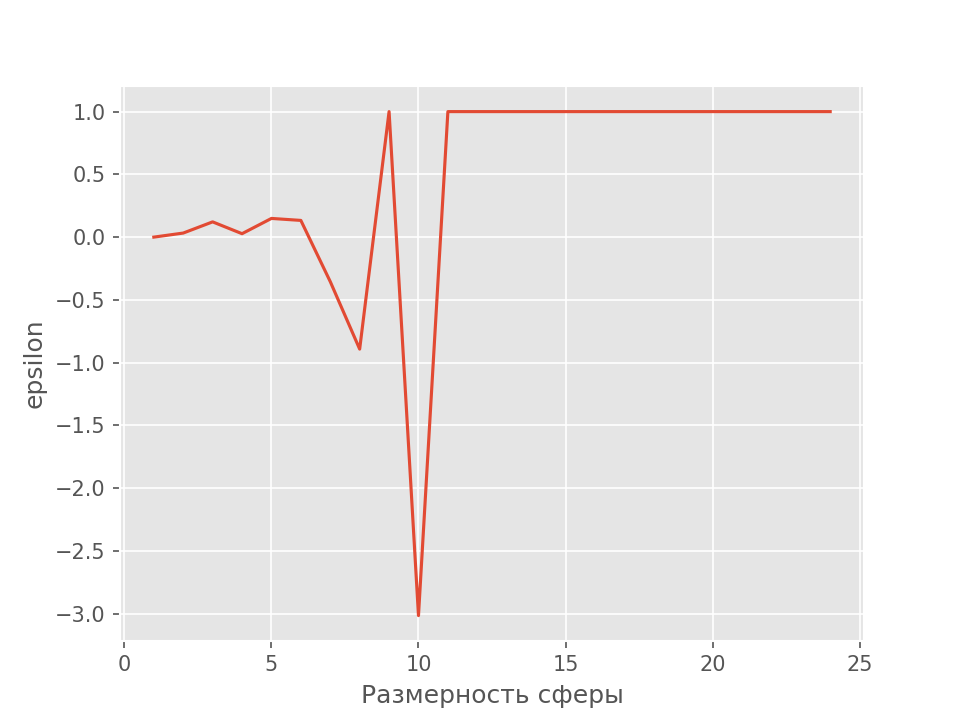

In [248]:
n = 100
r = 1

plt.figure()
D = []
eps = []
for d in range(1, 25):
    D.append(d)
    eps.append((getSphereVolumeExact(d, r) - getSphereVolumePseudorandom(n, d, r))/ getSphereVolumeExact(d, r))
plt.xlabel('Размерность сферы')
plt.ylabel('epsilon')
plt.plot(D, eps)
plt.show()


### Задание 1.3
Напишите функцию, вычисляющую объем сферы методом Монте-Карло на квазислучайной последовательности Соболя.

Для установки библиотеки `sobol_seq`:


выполните `pip install sobol_seq` в Jupyter или

выполните команду `pip install sobol_seq --user` в командном окне (если вы используете Jupyter Notebook в составе Anaconda откройте Anaconda Prompt и выполните команду pip в ней, после чего перезапустите Jupyter Notebook).


In [1]:
import sobol_seq

Используйте функцию `i4_sobol_generate`. Документацию по ней можно получить выполнив следующую строчку кода:

In [5]:
sobol_seq.i4_sobol_generate?

In [243]:
def getSphereVolumeQuasirandom(N, D, R = 1):
    data = sobol_seq.i4_sobol_generate(D, N)
    code = np.zeros(N)
    for i in range(N):
        if np.linalg.norm(data[i, :]) < 1:
            code[i] = 1
    V = (2 * R)**D * sum(code) / N
    return V

Сравните точность вычисления объема для квазислучайной и псевдослучайной последовательностей, рассчитав  $\epsilon(D)$, при таком же значении $N$, как в предыдущем задании. Постройте обе зависимости $\epsilon(D)$ на одном графике в логарифмической шкале по $\epsilon$.

<IPython.core.display.Javascript object>


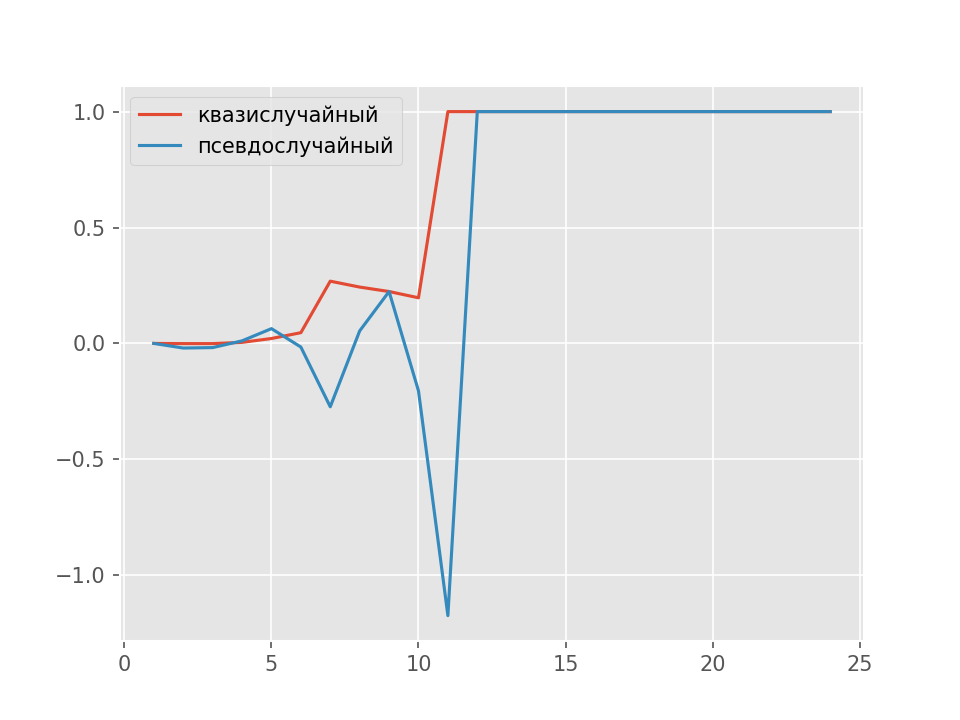

In [254]:
n = 1000
r = 1

plt.figure()
D = []
eps_p = []
eps_q = []
for d in range(1, 25):
    D.append(d)
    eps_p.append((getSphereVolumeExact(d, r) - getSphereVolumePseudorandom(n, d, r))/ getSphereVolumeExact(d, r))
    eps_q.append((getSphereVolumeExact(d, r) - getSphereVolumeQuasirandom(n, d, r))/ getSphereVolumeExact(d, r))
    
plt.plot(D, eps_q, label = 'квазислучайный')
plt.plot(D, eps_p, label = 'псевдослучайный')
plt.legend()
plt.show()

Сделайте вывды о работе псевдослучайной и квазислучайной последовательностях. 

Квазислучайная послдовательность работает немного лучше псевдослучайной, но они обе применимы только при достаточно малых d

## Задание 2

Рассмотрим решетку $n\times n$, в которой каждой ячейке соответствует спин $\sigma_i$ равный $+1$ или $-1$. При этом между соседними ячейками существует энергия взаимодействия
$$
E_i = -J \sigma_i \sigma_j
$$
Тогда энергия каждой ячейки 
$$
E_i = -J \sigma_i \sum_j \sigma_j
$$
где суммирование подразумевается только по соседним с $i$-ой ячейкой.

При нулевой температуре энергитически более выгодным состоянием является состояние, когда все спины одинаково ориентированы. Однако при ненулевой температуре вероятность перехода в более возбужденное состояние пропорциональна $\sim \exp(-\Delta E/ k T)$.

Явное численное моделирование такой системы (модели Изинга) является проблематичным, поскольку количество возможных состояний системы $2^N$, где $N$ - общее число узлов, и уже для двумерной сетки $16\times 16$ это число становится астрономически большим. 

На помощь приходят методы Монте-Карло. Одна из простейших его реализаций (алгоритм Метрополиса — Гастингса):
1. Задаем случайное начальное состояние
2. Выбираем случайную ячейку
3. Переворачиваем её спин и считаем изменение энергии $\delta E$ данной ячейки.
4. Если изменение энергии отрицательное, оставляем спин перевернутым
5. Если изменение энергии положительное, оставляем спин перевернутым с вероятностью $\exp(-\delta E/kT)$
6. Повторяем пункты 2-5 нужное количество раз

Спустя достаточно большое количество повторений устанавливается равновесное состояние. 

Реализуем данный алгоритм: 
1. Задайте начальное случайное расраспределение в виде матрицы из $+1$ и $-1$ размерности $N\times N$:

In [64]:
def cc(N):
    '''
    Функция задает случайное начальное состояние
    ---------
    Аргументы:
    N - int, линейный размер решетки 
    --------
    Функция возвращает:
    state - numpy ndarray of ints, массив состояния системы размера NxN
    '''
    state = np.zeros((N, N))
    random = np.random.rand(N, N)
    for i in range(N):
        for j in range(N):
            state[i][j] = 2 * round(random[i][j]) - 1
    return state

2. Напишите функцию, которая для ячейки $(i,j)$ расчитывает изменение её энергии, если изменить её знак. При этом для простоты предполагаем, во-первых, что $J=1$ (на него отнормируем kT), и во-вторых, что элементы находящиеся на верхней и нижней (левой и правой) границах находятся рядом друг с другом (топология тора).  


In [255]:
def getDeltaE(i, j, state):
    '''
    Функция расчитывает изменение энергии ячейки (i,j) в случае ее переворота (при этом функция сама не меняет сосотояния state)
    ---------
    Аргументы:
    i - int, адресс ячейки вдоль оси 0
    j - int, адресс ячейки вдоль оси 1
    state - numpy ndarray of ints, массив состояния системы размера NxN
    --------
    Функция возвращает:
    dE - float, изменение энергии
    '''
    n = len(state)
    
    dE = 2 * (state[(i+1)%n][j] + state[(i-1)%n][j] + state[i][(j+1)%n] + state[i][(j-1)%n]) * state[i][j]
    return dE

3. Напишите функцию, которая $N^2$ раз для разных случайных $(i,j)$ меняет спин в зависимости от изменения энергии, согласно пунктам 4. и 5. 

In [266]:
def makeFlip(T, state):
    '''
    Функция расчитывает изменение энергии ячейки (i,j) в случае ее переворота (при этом функция сама не меняет сосотояния state)
    ---------
    Аргументы:
    T - float, положительное число, безразмерный коэфициент, характеризующий температуру, равный kT/J
    state - numpy ndarray of ints, массив состояния системы размера NxN
    --------
    Функция возвращает:
    state - numpy ndarray of ints, массив нового состояния системы размера NxN
    '''
    n = len(state)
    
    for k in range(n**2):
        i = np.random.randint(0, n)
        j = np.random.randint(0, n)
        
        dE = getDeltaE(i, j, state)
        
        if  dE > 0:
            chance = np.exp(-dE/T)
            p = state[i][j]
            state[i][j] = p * np.random.choice([1, -1], p=[1 - chance, chance])
        else:
            state[i][j] = -state[i][j]
    return state

4. Напишите функцию, которая будет рассчитывать значение энергии всей системы (предполагаем $J=1$).

In [267]:
def getEnergy(state):
    '''
    Функция, рассчитывает значение энергии всей системы
    ---------
    Аргументы:
    state - numpy ndarray of ints, массив состояния системы размера NxN
    --------
    Функция возвращает:
    E - float, значение энергии системы
    '''
    E = 0
    n = len(state)
    for i in range(n):
        for j in range(n):
            E = -(state[(i+1)%n][j] + state[(i-1)%n][j] + state[i][(j+1)%n] + state[i][(j-1)%n]) * state[i][j]
    return E

5. Напишите функцию, которая будет рассчитывать значение намагниченности всей системы $M=\sum \sigma$

In [268]:
def getMagnetization(state):    
    '''
    Функция, рассчитывает значение намагниченности всей системы
    ---------
    Аргументы:
    state - numpy ndarray of ints, массив состояния системы размера NxN
    --------
    Функция возвращает:
    M - float, значение намагниченности системы
    '''
    M = sum(sum(state))
    return M

В следующей ячейке кода зададим начальные параметры: 

**Nt** - количество точек по температуре, 

**N** - линейный размер решетки, 

**eqStep** - количество попыток переворота спина, в течение которых система приводится к равновесному сосотоянию. Обратите внимание, что это число должно увеличиваться пропорционально размеру всей сетки,

**steps** - количество попыток переворота спина, в течение которых рассчитывается значения энергии и намагниченности (нужно для усреднения расчитанных значений по ансамблю состояний, близких к равновесному)

In [271]:
N       = 10         # размер решетки NxN
Nt      = 100         # количество точек температуры
eqSteps = 150        # количество раз выполнения makeFlip для установления равновесия
steps   = 30         # количество раз выполнения makeFlip для усреднения энергии и намагниченности

T = np.linspace(0.5, 5, Nt); 
E, M = np.zeros(Nt), np.zeros(Nt)

<IPython.core.display.Javascript object>


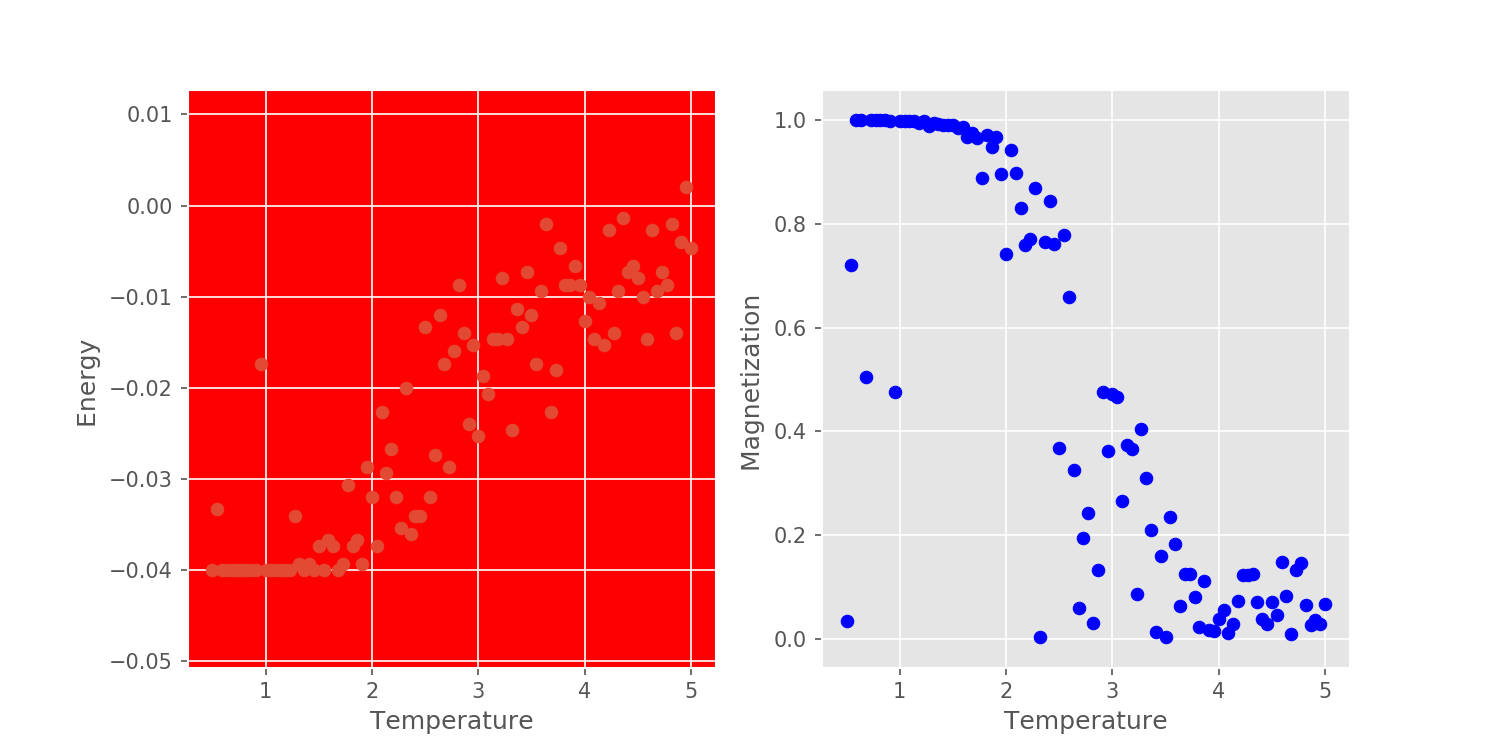

In [272]:
for t in range(Nt):
    print("Complete", t/Nt*100, '%\r', end='')
    
    Esum = 0
    Msum = 0
    state = getInitialState(N)
    
    for i in range(eqSteps):         # установление статистического равновесия
        makeFlip(T[t], state)          

    for i in range(steps):           # суммирование по разным состояниям близким к равновеснсому
        makeFlip(T[t], state)          
        Esum += getEnergy(state)       
        Msum += getMagnetization(state) 

    E[t] = Esum / (steps * N * N)
    M[t] = Msum / (steps * N * N)

print("Done              \r", end='')

_, ax = plt.subplots(1,2,figsize=(10, 5));

ax[0].scatter(T, E)
ax[0].set_xlabel("Temperature");
ax[0].set_ylabel("Energy ");

ax[1].scatter(T, abs(M), color = 'blue')
ax[1].set_xlabel("Temperature"); 
ax[1].set_ylabel("Magnetization ");

Интерпретируйте с точки зрения физики полученные графики. Описывают ли они поведение ферромагнетиков и фазовые переходы?

In [ ]:
# Write your answer here

Задайте новое сосотояние системы с достаточно большим $N$ и визуализируйте его думя цветами (например с помощью `plt.scatter`). Примените несколько раз к этому сосотоянию функциию makeFlip с низкой и с высокой температурами. Объясните наблюдаемое

In [316]:
N = 64
state = getInitialState(N)

<IPython.core.display.Javascript object>


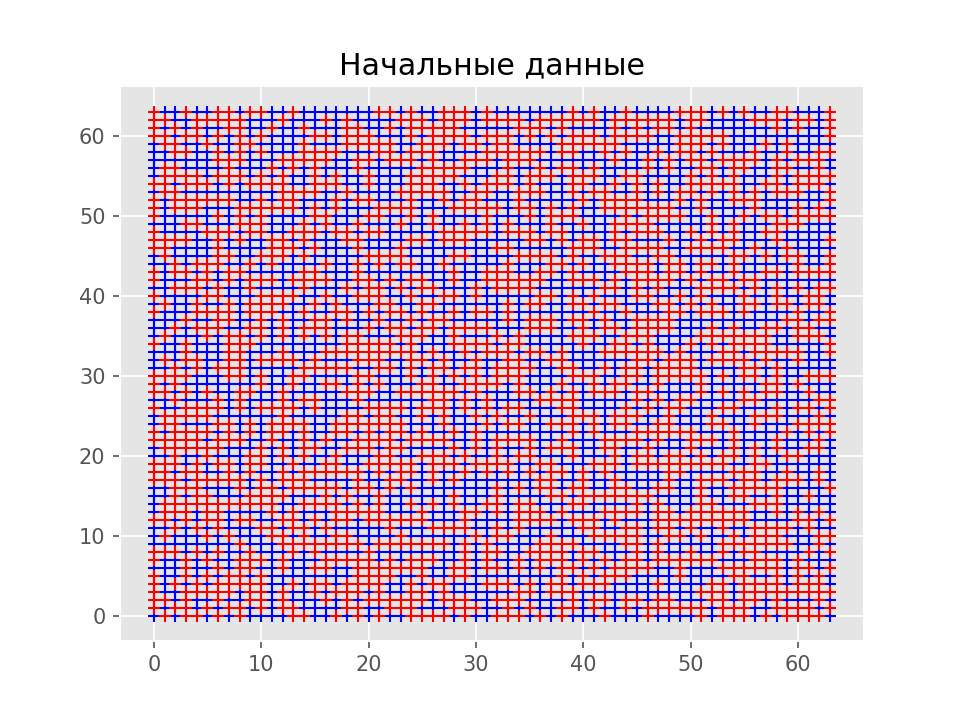

<IPython.core.display.Javascript object>


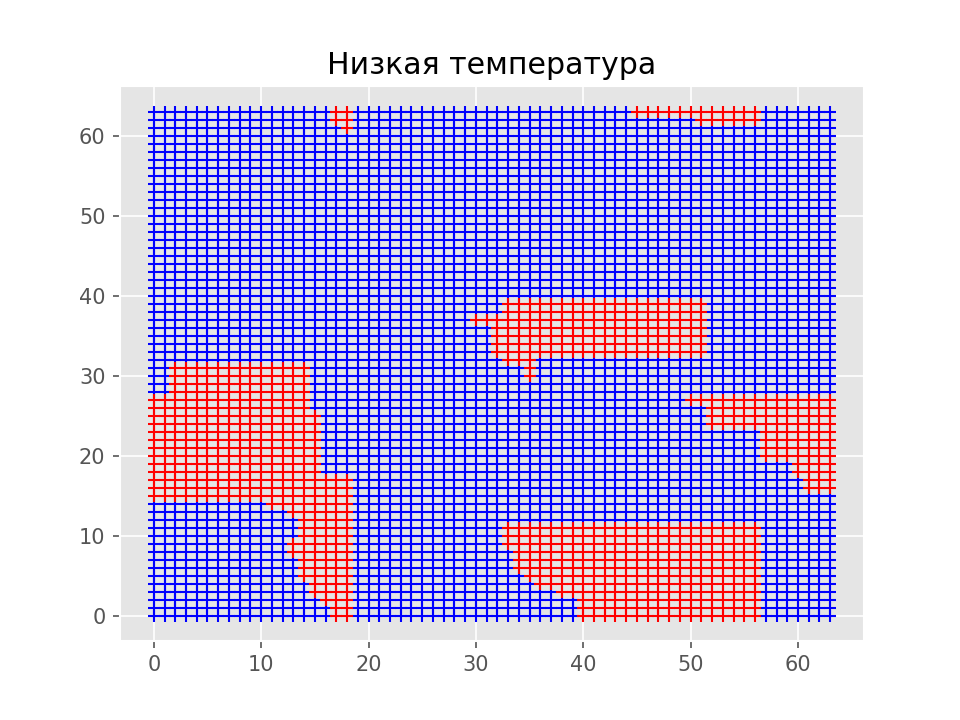

<IPython.core.display.Javascript object>


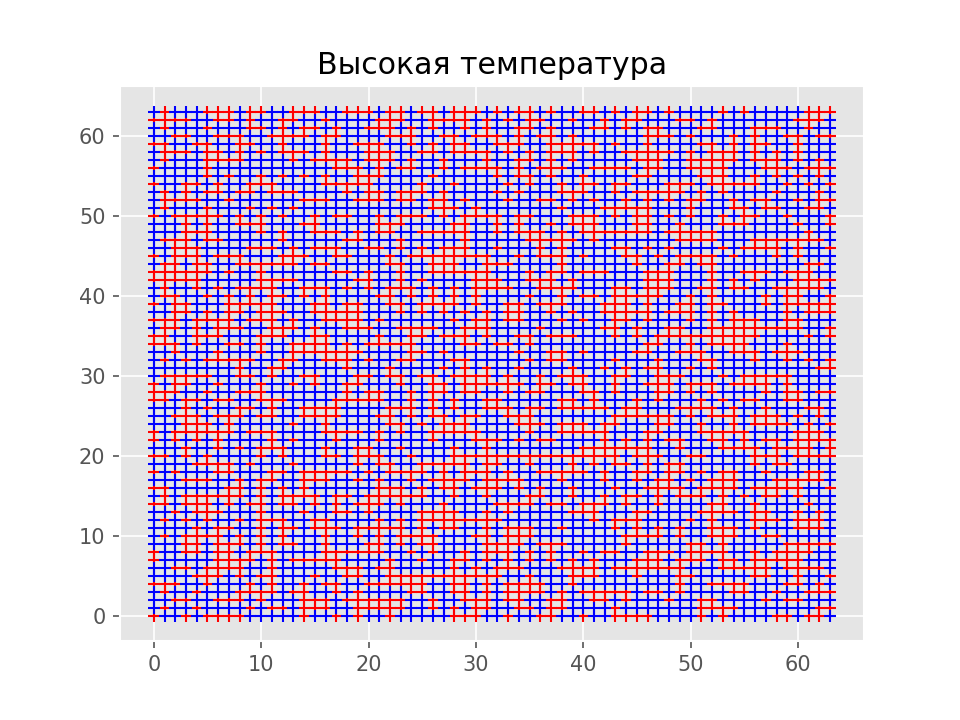

In [317]:
plt.figure() 

plt.title('Начальные данные')
plt.plot(np.nonzero(state>0)[0], np.nonzero(state>0)[1], '+', color = 'b')
plt.plot(np.nonzero(state<0)[0], np.nonzero(state<0)[1], '+', color = 'r')

plt.show()


for i in range(N):
    makeFlip(0.5, state);
    
plt.figure() 
plt.title('Низкая температура')
plt.plot(np.nonzero(state>0)[0], np.nonzero(state>0)[1], '+', color = 'b')
plt.plot(np.nonzero(state<0)[0], np.nonzero(state<0)[1], '+', color = 'r')
plt.show()


for i in range(N):
    makeFlip(1000, state);
    
plt.figure() 

plt.title('Высокая температура')
plt.plot(np.nonzero(state>0)[0], np.nonzero(state>0)[1], '+', color = 'r')
plt.plot(np.nonzero(state<0)[0], np.nonzero(state<0)[1], '+', color = 'b')

plt.show()

При низких температурах энергия стремиться к минимальной, так как в этом случае вероятность того, что она увеличится мала (порядка e^(1/t)).
Однако, при больших температурах вероятность того, что энергия увеличится или уменьшится почти одинаковая и равна 1